# Figuring out BH efficiency 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u
from astropy import constants as const

#plotting things 
%config InlineBackend.figure_format = 'retina'

plt.rc('font', family='serif')
plt.rcParams['text.usetex'] = False
fs = 40

# update various fontsizes to match
params = {'figure.figsize': (20, 14),
          'legend.fontsize': 20,
          'axes.labelsize': fs,
          'xtick.labelsize': 0.9 * fs,
          'ytick.labelsize': 0.9 * fs,
          'axes.linewidth': 1.1,
          'xtick.major.size': 16,
          'xtick.minor.size': 13,
          'ytick.major.size': 16,
          'ytick.minor.size': 13}
plt.rcParams.update(params)

In [2]:
CB_color_cycle = ['#377eb8', '#ff7f00', '#4daf4a',
                  '#f781bf', '#a65628', '#984ea3',
                  '#999999', '#e41a1c', '#dede00']

In [3]:
#getting constants and units in working order
c = const.c.to('cm/s')
mbh = np.arange(10**6,10**9,1000)
mbh = mbh * u.M_sun #needs to be in grams for the equation 
mbh = mbh.to(u.g)

In [4]:
EBH_eagle = 0.0167* (mbh)*c**2 #erg
EBH_r25 = 0.002* (mbh)*c**2

In [5]:
mbh_solmas = mbh.to(u.kg)
mbh_solmas = mbh_solmas/const.M_sun
mbh_solmas

<Quantity [1.00000e+06, 1.00100e+06, 1.00200e+06, ..., 9.99997e+08,
           9.99998e+08, 9.99999e+08]>

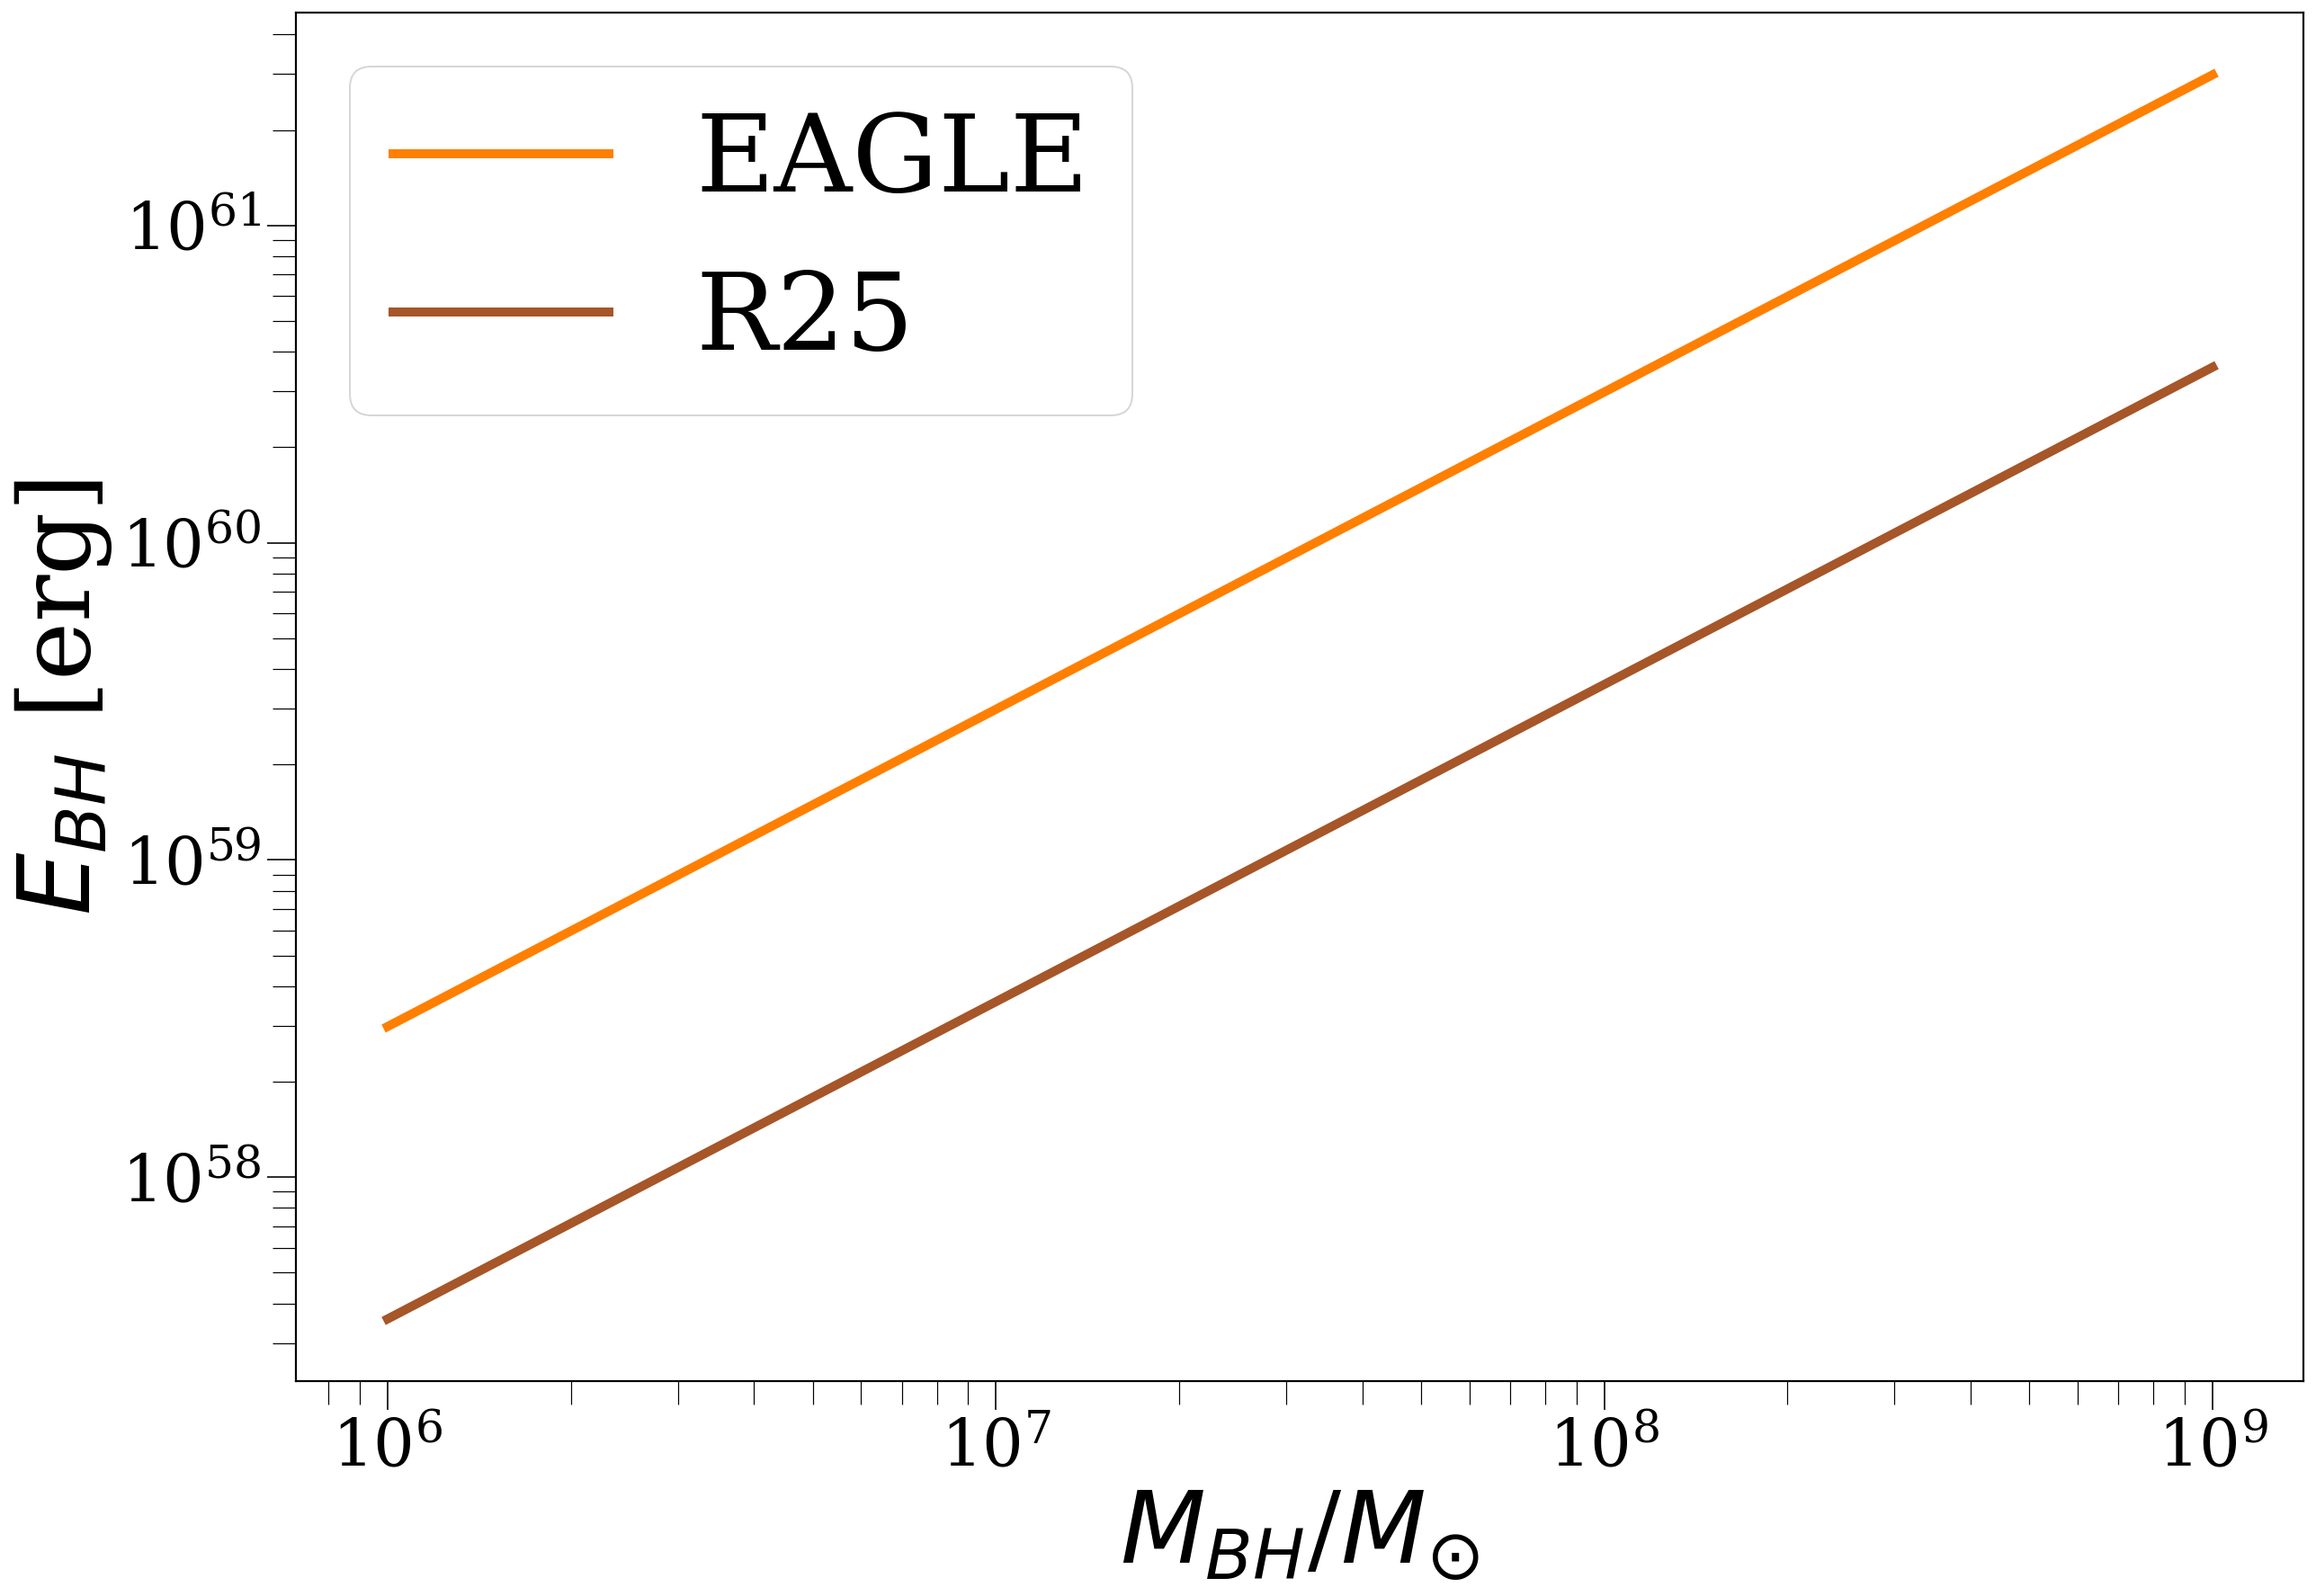

In [6]:
plt.loglog(mbh_solmas,EBH_eagle, lw = 5, color = CB_color_cycle[1], label = "EAGLE")
plt.loglog(mbh_solmas, EBH_r25, lw = 5, color = CB_color_cycle[4], label = "R25")
plt.legend(fontsize=60)
plt.xlabel('$M_{BH}$/$M_{\odot}$',fontsize=55)
plt.ylabel('$E_{BH}$ [erg]',fontsize=55)
plt.savefig('Figures/bh_eff_better.png')
plt.show()